# Concrete Compressive Strength.

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

Here is your Required [Data ](https://drive.google.com/file/d/1Csmy8fz4BDM70wD07XJYKPqOr8BAPfzE/view?usp=sharing)
# **Good Luck**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
concrete = pd.read_excel('Concrete_Data.xls')
concrete

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,2.5,28,79.986111
1,540.0,0.0,2.5,28,61.887366
2,332.5,142.5,0.0,270,40.269535
3,332.5,142.5,0.0,365,41.052780
4,198.6,132.4,0.0,360,44.296075
...,...,...,...,...,...
1025,276.4,116.0,8.9,28,44.284354
1026,322.2,0.0,10.4,28,31.178794
1027,148.5,139.4,6.1,28,23.696601
1028,159.1,186.7,11.3,28,32.768036


In [3]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 5 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(4), int64(1)
memory usage: 40.4 KB


In [4]:
print (concrete.isnull().sum())

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


In [5]:
X = concrete.iloc[:,:-1].values 
y = concrete.iloc[:,-1].values
y=y.reshape(-1,1)


In [6]:
import matplotlib.pyplot as plt
corr = concrete.corr()
corr.style.background_gradient(cmap='coolwarm')

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1,-0.275193,0.0927714,0.0819473,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275193,1,0.0433757,-0.0442458,0.134824
Superplasticizer (component 5)(kg in a m^3 mixture),0.0927714,0.0433757,1,-0.192717,0.366102
Age (day),0.0819473,-0.0442458,-0.192717,1,0.328877
"Concrete compressive strength(MPa, megapascals)",0.497833,0.134824,0.366102,0.328877,1


In [7]:
from  sklearn.model_selection  import train_test_split
X_train,X_test,y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Score =  0.5811192779938399
X size (206, 4) Y size  (206, 1)


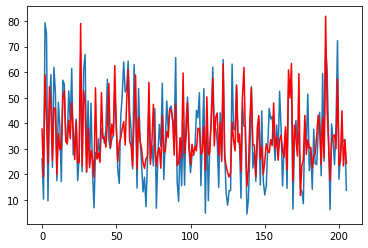

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.predict(X_test)
from sklearn.metrics import r2_score
R2=r2_score(y_test ,lin_reg.predict(X_test) )
print('Score = ', R2)
print('X size',X_test.shape , 'Y size ', y_test.shape)
plt.plot(range(len(y_test)), np.sort(y_test))
plt.plot(range(len(y_test)),np.sort(lin_reg.predict(X_test)),c='r')

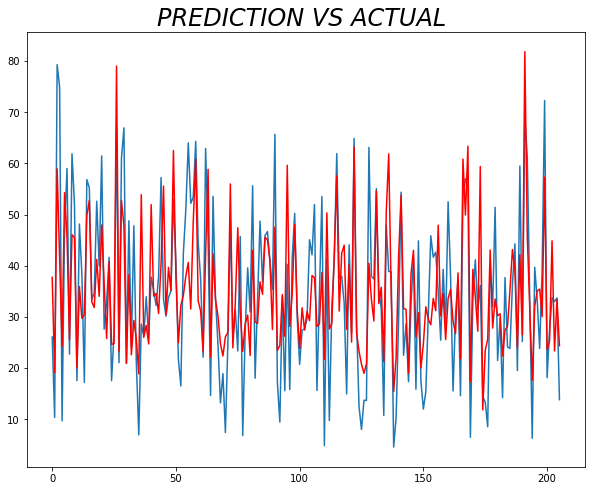

In [10]:
def display(y_test,y_pred):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,8))
    plt.title('PREDICTION VS ACTUAL ', fontsize=24 , fontstyle='italic')
    plt.plot(range(len(y_test)), np.sort(y_test))
    plt.plot(range(len(y_test)),np.sort(y_pred),c='r')
    plt.show()
display(y_test,lin_reg.predict(X_test))


R2 =  0.8111938239753191


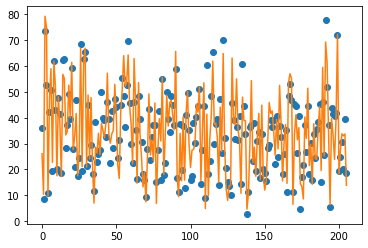

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =3 )
X_train_poly = poly.fit_transform(X_train)
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly , y_train)
lin_reg_poly.predict(X_test_poly)
from sklearn.metrics import r2_score
R2_poly = r2_score(y_test,lin_reg_poly.predict(X_test_poly))
print("R2 = ", R2_poly)
plt.plot(lin_reg_poly.predict(X_test_poly),'o' , y_test , '-')


In [12]:
Alpha_Vs_Ridge={}
for alpha in [1E-10 , 1E-15 , 1E-13 , 1E-12 , 1E-20 , 1E-30 , 1E-25 , 1E-50, 1E-100] :
    from sklearn.linear_model import Ridge
    ridge = Ridge(alpha = alpha , normalize = True)
    ridge.fit (X_train_poly , y_train )
    R2_ridge = r2_score (y_test , ridge.predict(X_test_poly) )
    Alpha_Vs_Ridge['Alpha =',alpha] = R2_ridge
   

Ridge_Values=[]
Ridge_Values.append(Alpha_Vs_Ridge.values())
max(Ridge_Values[0])
for alpha, R2_ridge in Alpha_Vs_Ridge.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
    if max(Ridge_Values[0]) == R2_ridge:
        print('best alpha is ' ,alpha)
        break


best alpha is  ('Alpha =', 1e-10)


C:\Users\AhmedAbdAllah\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.00572e-16): result may not be accurate.
  overwrite_a=True).T
C:\Users\AhmedAbdAllah\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.00572e-21): result may not be accurate.
  overwrite_a=True).T
C:\Users\AhmedAbdAllah\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.00572e-31): result may not be accurate.
  overwrite_a=True).T
C:\Users\AhmedAbdAllah\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.00572e-26): result may not be accurate.
  overwrite_a=True).T
C:\Users\AhmedAbdAllah\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.00572e-51): result may not be accurate.
  overwrite_a=True).T
C:\Users\AhmedAbdAll

C:\Users\AhmedAbdAllah\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20340.926030369545, tolerance: 23.258623112598066
  positive)
C:\Users\AhmedAbdAllah\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20341.15494658511, tolerance: 23.258623112598066
  positive)
C:\Users\AhmedAbdAllah\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20341.154719956423, tolerance: 23.258623112598066
  positive)
C:\Users\AhmedAbdAllah\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increas

best alpha is  ('Alpha =', 1e-10)


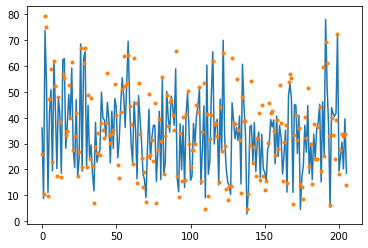

In [13]:
Alpha_Vs_Lasso={}
for alpha in [1E-10 , 1E-15 , 1E-13 , 1E-12 , 1E-20 , 1E-30 , 1E-25 , 1E-50, 1E-100] :
    from sklearn.linear_model import Lasso
    lasso = Lasso(alpha = alpha , normalize = True)
    lasso.fit (X_train_poly , y_train )
    R2_lasso = r2_score (y_test , lasso.predict(X_test_poly) )
    Alpha_Vs_Lasso['Alpha =',alpha] = R2_lasso

plt.plot(lasso.predict(X_test_poly),'-' , y_test , '.')
Lasso_Values=[]
Lasso_Values.append(Alpha_Vs_Lasso.values())
max(Lasso_Values[0])
for alpha, R2_lasso in Alpha_Vs_Lasso.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
    if max(Lasso_Values[0]) == R2_lasso:
        print('best alpha is ',alpha)
        break
redict = concrete.iloc[-1 , :-1].values
redict=redict.reshape(-1,1)


0.9005958697174183


C:\Users\AhmedAbdAllah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


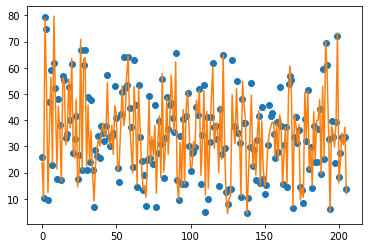

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
model_GBR = GradientBoostingRegressor(learning_rate=.4)
model_GBR.fit(X_train,y_train)
y_Gpred=model_GBR.predict(X_test)
q=r2_score(y_test,y_Gpred)
print(q)
plt.plot(y_test,'o',y_Gpred,'-')

In [21]:
from catboost import CatBoostRegressor
model_CBR = CatBoostRegressor(iterations=350,
                          learning_rate=0.3,
                          depth=7)
model_CBR.fit(X_train, y_train)
preds = model_CBR.predict(X_test)

0:	learn: 14.0374527	total: 6.1ms	remaining: 2.13s
1:	learn: 11.7030750	total: 9.75ms	remaining: 1.7s
2:	learn: 10.0352137	total: 13.5ms	remaining: 1.56s
3:	learn: 8.7852351	total: 17ms	remaining: 1.47s
4:	learn: 7.9255519	total: 20.6ms	remaining: 1.42s
5:	learn: 7.4314261	total: 24.5ms	remaining: 1.41s
6:	learn: 6.8957795	total: 28.3ms	remaining: 1.39s
7:	learn: 6.5446033	total: 32ms	remaining: 1.37s
8:	learn: 6.2397330	total: 36.9ms	remaining: 1.4s
9:	learn: 5.9977843	total: 40.6ms	remaining: 1.38s
10:	learn: 5.8422296	total: 44.3ms	remaining: 1.36s
11:	learn: 5.7430242	total: 48.4ms	remaining: 1.36s
12:	learn: 5.6686101	total: 51.9ms	remaining: 1.35s
13:	learn: 5.5304655	total: 56.2ms	remaining: 1.35s
14:	learn: 5.4714033	total: 59.8ms	remaining: 1.33s
15:	learn: 5.3770676	total: 63.3ms	remaining: 1.32s
16:	learn: 5.2941120	total: 66.9ms	remaining: 1.31s
17:	learn: 5.2454863	total: 70.6ms	remaining: 1.3s
18:	learn: 5.1669527	total: 74.4ms	remaining: 1.29s
19:	learn: 5.1197667	total:

182:	learn: 2.1385460	total: 663ms	remaining: 605ms
183:	learn: 2.1344459	total: 667ms	remaining: 602ms
184:	learn: 2.1271850	total: 670ms	remaining: 598ms
185:	learn: 2.1177494	total: 675ms	remaining: 595ms
186:	learn: 2.1148087	total: 677ms	remaining: 590ms
187:	learn: 2.1101202	total: 681ms	remaining: 586ms
188:	learn: 2.1013656	total: 684ms	remaining: 583ms
189:	learn: 2.0956607	total: 688ms	remaining: 579ms
190:	learn: 2.0925170	total: 691ms	remaining: 576ms
191:	learn: 2.0860562	total: 695ms	remaining: 572ms
192:	learn: 2.0792237	total: 699ms	remaining: 569ms
193:	learn: 2.0789461	total: 703ms	remaining: 565ms
194:	learn: 2.0736061	total: 706ms	remaining: 561ms
195:	learn: 2.0698941	total: 712ms	remaining: 559ms
196:	learn: 2.0657402	total: 717ms	remaining: 557ms
197:	learn: 2.0623684	total: 720ms	remaining: 553ms
198:	learn: 2.0530663	total: 725ms	remaining: 550ms
199:	learn: 2.0448547	total: 729ms	remaining: 547ms
200:	learn: 2.0422024	total: 734ms	remaining: 544ms
201:	learn: 

In [22]:
print("Score of catboost is",r2_score(preds,y_test))

Score of catboost is 0.9193046334072186
